# Global Power Plant Database

Project Description:
    
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database:

The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas methods to combine all the datasets and then start working on this project.


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database


*Statement Problem:
To predict the primary fuel and capacity of power generation plants based on the different parameter.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings ("ignore")

In [2]:
# Load and Explore the Dataset into a Pandas DataFrame.
link1="https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Global%20Power%20Plant%20Database/database_AUS.csv"
link2="https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Global%20Power%20Plant%20Database/database_IND.csv"
link3="https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Global%20Power%20Plant%20Database/database_USA.csv"


df_aus=pd.read_csv(link1)
df_ind=pd.read_csv(link2)
df_usa=pd.read_csv(link3)

In [3]:
df_aus.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_ind.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df_usa.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_globa =pd.concat([df_aus,df_ind,df_usa])

In [7]:
df_globa

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [8]:
#Columns present in the dataset 
df_globa.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
#shape of the Data
df_globa.shape

(13298, 27)

Observation:

This dataset contain the database of three countries power plants generating system showing the information of plant capacity, generation, ownership, and fuel type.. The datas are numerical, categorical and continous datas. There are 13298 samples in the dataset with 27 columns of which 2 of them are to be considered as the target variables ('primary_fuel and capacity_mw').

Data Preprocessing

In [10]:
# Checking the column information
df_globa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

Observation:

The columns have 2 different data types made up of 14 object dtypes and 13 floats Dtypes.

Most of the columns have missing information.

In [11]:
total = df_globa.isnull().sum().sort_values(ascending=False)
percent_1 = df_globa.isnull().sum()/df_globa.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
estimated_generation_gwh,13298,100.0
wepp_id,13298,100.0
other_fuel3,13206,99.3
other_fuel2,13028,98.0
other_fuel1,11670,87.8
generation_gwh_2013,6128,46.1
generation_gwh_2014,5764,43.3
generation_gwh_2015,5305,39.9
generation_gwh_2016,4597,34.6
generation_gwh_2017,4006,30.1


The features with less than 80% missing values can easily be filled. Columns with above 79% of missings values will be dropped and other non-contributory features.

In [12]:

# Drop columns that are not relevant for the analysis
df_globa.drop(columns=['other_fuel1', 'other_fuel2', 'other_fuel3', 'url', 'geolocation_source', 'wepp_id', 'estimated_generation_gwh'], inplace=True)


In [13]:
df_globa

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,2011.00000,Adelaide Airport Ltd,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,Adelaide Showgrounds,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,2004.00000,Alice Springs Airport,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,2015.00000,Energy Response,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,2012.00000,Zotos International,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,2018.00000,Zumbro Solar LLC,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,Zumbro Garden LLC,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,Public Service Co of Colorado,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration


In [14]:
# Checking the column information
df_globa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   gppd_idnr               13298 non-null  object 
 4   capacity_mw             13292 non-null  float64
 5   latitude                13220 non-null  float64
 6   longitude               13220 non-null  float64
 7   primary_fuel            11294 non-null  object 
 8   commissioning_year      10654 non-null  float64
 9   owner                   12705 non-null  object 
 10  source                  13298 non-null  object 
 11  year_of_capacity_data   12860 non-null  float64
 12  generation_gwh_2013     7170 non-null   float64
 13  generation_gwh_2014     7534 non-null   float64
 14  generation_gwh_2015     7993 non-null 

In [15]:
# Fill missing values
df_globa['capacity_mw'].fillna(df_globa['capacity_mw'].mean(), inplace=True)
df_globa['latitude'].fillna(df_globa['latitude'].mean(), inplace=True)
df_globa['longitude'].fillna(df_globa['longitude'].mean(), inplace=True)
df_globa['commissioning_year'].fillna(df_globa['commissioning_year'].mean(), inplace=True)
df_globa['year_of_capacity_data'].fillna(df_globa['year_of_capacity_data'].mode()[0], inplace=True)
df_globa['generation_gwh_2013'].fillna(df_globa['generation_gwh_2013'].mean(), inplace=True)
df_globa['generation_gwh_2014'].fillna(df_globa['generation_gwh_2014'].mean(), inplace=True)
df_globa['generation_gwh_2015'].fillna(df_globa['generation_gwh_2015'].mean(), inplace=True)
df_globa['generation_gwh_2016'].fillna(df_globa['generation_gwh_2016'].mean(), inplace=True)
df_globa['generation_gwh_2017'].fillna(df_globa['generation_gwh_2017'].mean(), inplace=True)
df_globa['generation_gwh_2018'].fillna(df_globa['generation_gwh_2018'].mean(), inplace=True)
df_globa['generation_gwh_2019'].fillna(df_globa['generation_gwh_2019'].mode()[0], inplace=True)
df_globa['primary_fuel'].fillna(df_globa['primary_fuel'].mode()[0], inplace=True)
df_globa['generation_data_source'].fillna(df_globa['generation_data_source'].mode()[0], inplace=True)


In [16]:
df_globa

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,2011.000000,Adelaide Airport Ltd,Australian Renewable Energy Mapping Infrastruc...,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,1998.184904,Adelaide Showgrounds,Australian Renewable Energy Mapping Infrastruc...,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,1998.184904,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0.0,Australia Clean Energy Regulator
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,2004.000000,Alice Springs Airport,Australian Renewable Energy Mapping Infrastruc...,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,2015.000000,Energy Response,Australian Renewable Energy Mapping Infrastruc...,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,2012.000000,Zotos International,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,2018.000000,Zumbro Solar LLC,U.S. Energy Information Administration,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,1.161000,1.589,U.S. Energy Information Administration
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,Solar,1998.184904,Zumbro Garden LLC,U.S. Energy Information Administration,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,Solar,1998.184904,Public Service Co of Colorado,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration


Text(0.5, 1.0, 'Capacity of power generated According to country')

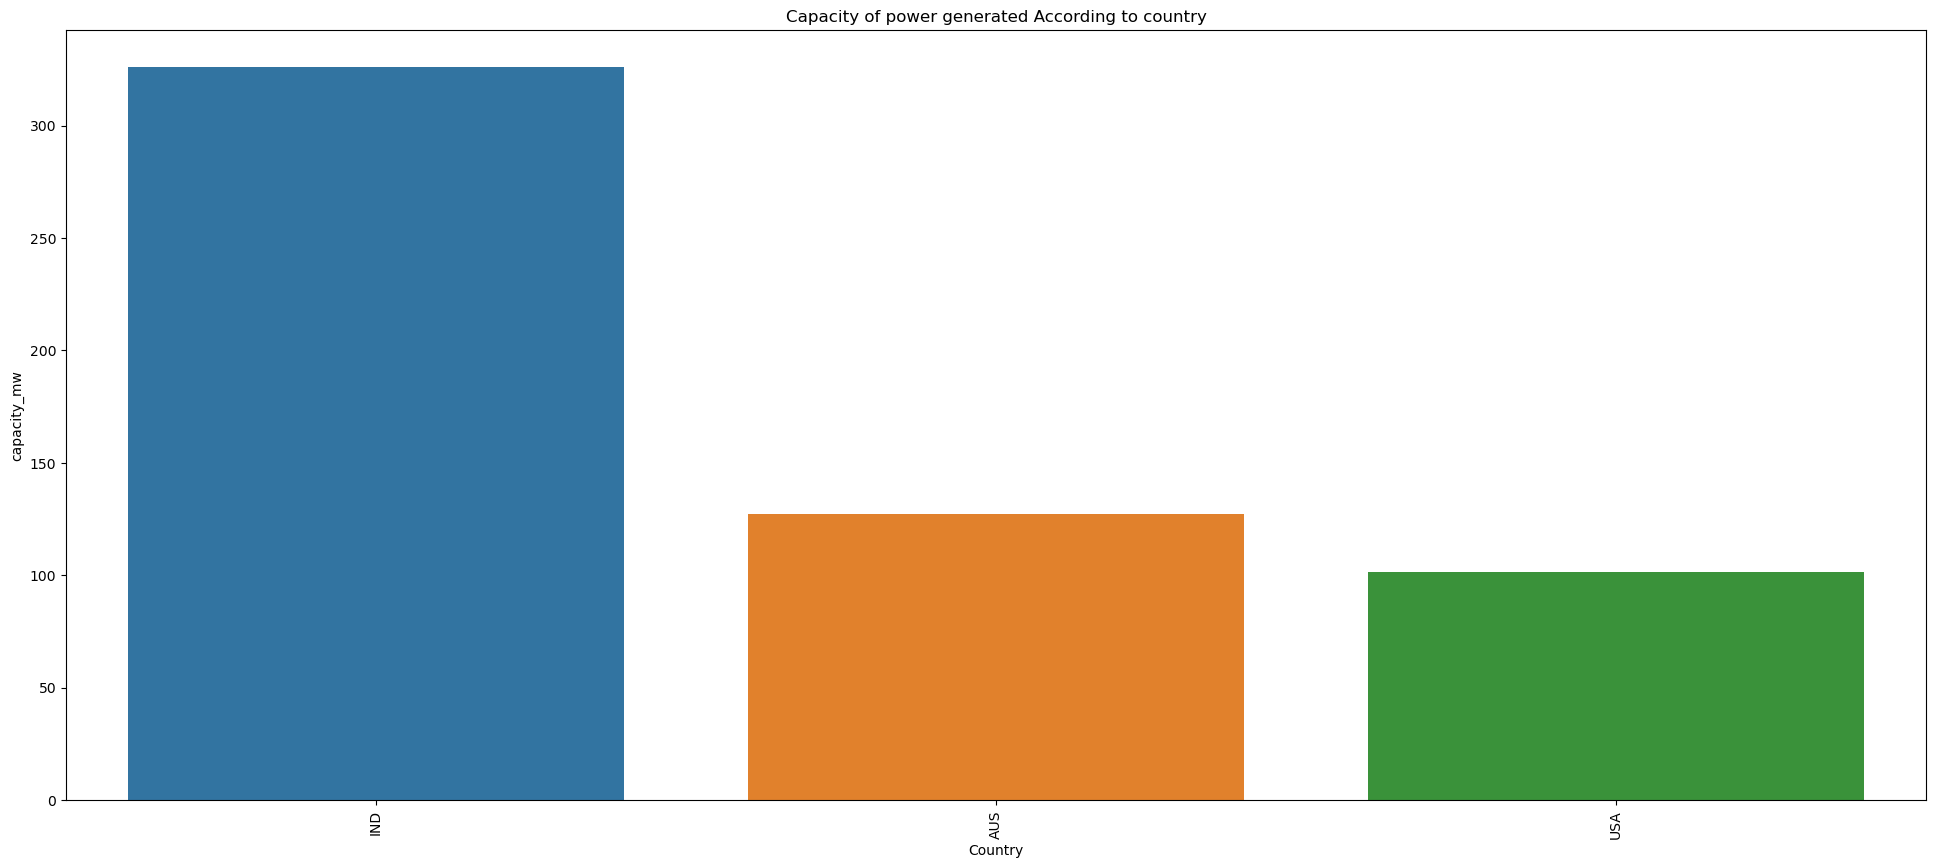

In [17]:
##Plot Capacity against Country
country_list=list(df_globa.country.unique())
capacity_mw=[]

for i in country_list:
    x=df_globa[df_globa.country==i]
    country_cap=sum(x.capacity_mw)/len(x)
    capacity_mw.append(country_cap)

df1=pd.DataFrame({'country_list':country_list,'capacity_mw':capacity_mw})
new_index=df1.capacity_mw.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.country_list,y=sorted_data.capacity_mw)

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('capacity_mw')
plt.title('Capacity of power generated According to country')

The above shows that India generated the highest Energy according to the data 

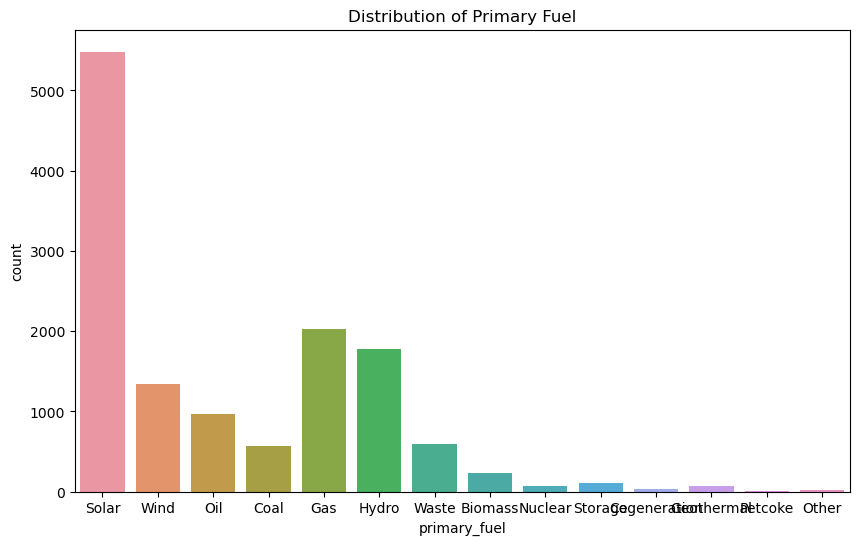

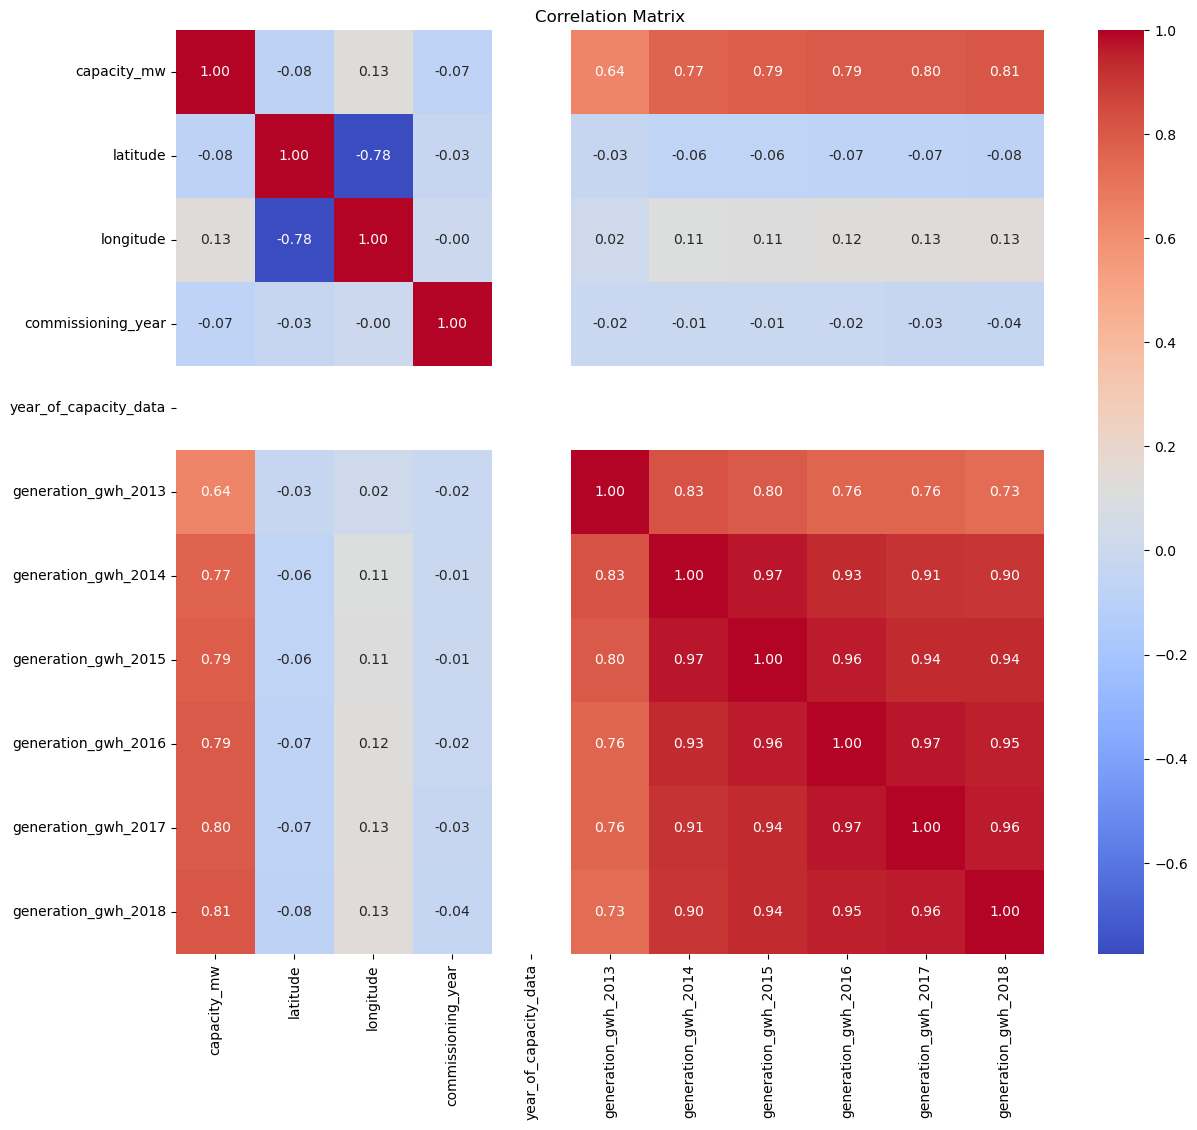

In [18]:
# Plotting the distribution of the target variable 'primary_fuel'
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=df_globa)
plt.title('Distribution of Primary Fuel')
plt.show()

# Correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df_globa.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Solar is the most commonly source of generating Power followed by Gas and Hydro.

In [19]:
#Rechecking missing values
total = df_globa.isnull().sum().sort_values(ascending=False)
percent_1 = df_globa.isnull().sum()/df_globa.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
owner,593,4.5
country,0,0.0
year_of_capacity_data,0,0.0
generation_gwh_2019,0,0.0
generation_gwh_2018,0,0.0
generation_gwh_2017,0,0.0
generation_gwh_2016,0,0.0
generation_gwh_2015,0,0.0
generation_gwh_2014,0,0.0
generation_gwh_2013,0,0.0


In [20]:
#Unique values in each of the colums

df_globa.nunique().to_frame("Unique Values")

,Unique Values
country,3
country_long,3
name,13266
gppd_idnr,13298
capacity_mw,2305
latitude,12386
longitude,12734
primary_fuel,14
commissioning_year,1937
owner,5877


In [21]:
#Drop columns that are not relevants to the analysis like Country, Name etc

df_globa.drop(columns=['country', 'gppd_idnr','country_long', 'name', 'commissioning_year', 'owner','source', 'year_of_capacity_data', 'generation_data_source'], inplace=True)

In [22]:
# Checking the column information
df_globa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13298 non-null  float64
 1   latitude             13298 non-null  float64
 2   longitude            13298 non-null  float64
 3   primary_fuel         13298 non-null  object 
 4   generation_gwh_2013  13298 non-null  float64
 5   generation_gwh_2014  13298 non-null  float64
 6   generation_gwh_2015  13298 non-null  float64
 7   generation_gwh_2016  13298 non-null  float64
 8   generation_gwh_2017  13298 non-null  float64
 9   generation_gwh_2018  13298 non-null  float64
 10  generation_gwh_2019  13298 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.2+ MB


In [23]:
# Encode categorical variables to change them to figures
from sklearn.preprocessing import LabelEncoder


In [24]:
# Encode categorical variables
categorical_columns = df_globa.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_globa[col] = le.fit_transform(df_globa[col].astype(str))
    label_encoders[col] = le

In [25]:
df_globa

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
1,1.00,-34.9453,138.5882,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
2,21.60,-35.0641,117.7977,13,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,196
3,0.24,-23.7966,133.8971,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
4,4.00,-34.5509,138.7659,7,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
...,...,...,...,...,...,...,...,...,...,...,...
11874,3.40,42.8869,-76.9683,13,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,736
11875,1.00,44.3195,-92.6703,10,563.383222,635.739731,616.801877,561.784508,532.472482,1.161000,938
11876,0.00,44.0460,-92.7600,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
11877,0.00,39.7373,-105.0170,10,0.000000,0.000000,0.000000,561.784508,532.472482,513.679016,196


In [26]:
cor_globa =df_globa.corr()
cor_globa

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,-0.080810,0.127417,-0.362352,0.643984,0.769397,0.789521,0.793396,0.795445,0.807174,0.089407
latitude,-0.080810,1.000000,-0.775317,0.099134,-0.032767,-0.062091,-0.064229,-0.069707,-0.074479,-0.076225,0.233347
longitude,0.127417,-0.775317,1.000000,-0.166047,0.015434,0.107483,0.113410,0.121007,0.129664,0.134100,-0.329755
primary_fuel,-0.362352,0.099134,-0.166047,1.000000,-0.139580,-0.180305,-0.195540,-0.204093,-0.211621,-0.222371,-0.026956
generation_gwh_2013,0.643984,-0.032767,0.015434,-0.139580,1.000000,0.825320,0.796210,0.761245,0.763528,0.732163,0.066879
generation_gwh_2014,0.769397,-0.062091,0.107483,-0.180305,0.825320,1.000000,0.966543,0.931666,0.912316,0.904722,0.013091
generation_gwh_2015,0.789521,-0.064229,0.113410,-0.195540,0.796210,0.966543,1.000000,0.960081,0.936988,0.935031,0.009976
generation_gwh_2016,0.793396,-0.069707,0.121007,-0.204093,0.761245,0.931666,0.960081,1.000000,0.966268,0.952001,-0.001370
generation_gwh_2017,0.795445,-0.074479,0.129664,-0.211621,0.763528,0.912316,0.936988,0.966268,1.000000,0.963681,-0.008597
generation_gwh_2018,0.807174,-0.076225,0.134100,-0.222371,0.732163,0.904722,0.935031,0.952001,0.963681,1.000000,-0.008658


In [27]:
cor_globa['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
latitude               0.099134
generation_gwh_2019   -0.026956
generation_gwh_2013   -0.139580
longitude             -0.166047
generation_gwh_2014   -0.180305
generation_gwh_2015   -0.195540
generation_gwh_2016   -0.204093
generation_gwh_2017   -0.211621
generation_gwh_2018   -0.222371
capacity_mw           -0.362352
Name: primary_fuel, dtype: float64

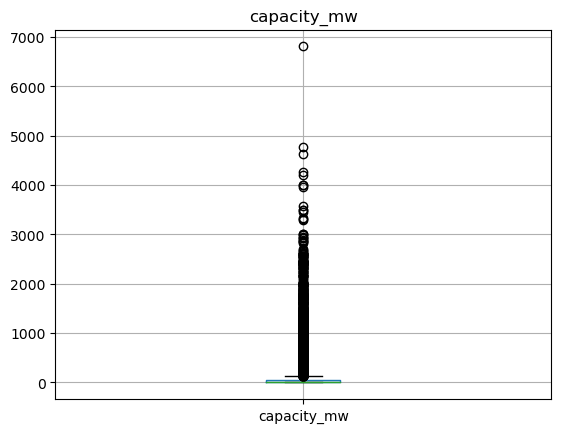

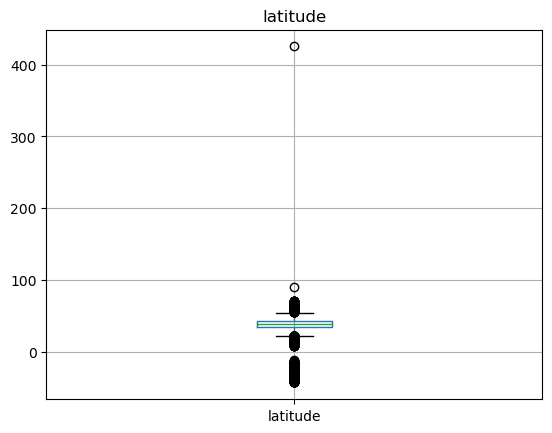

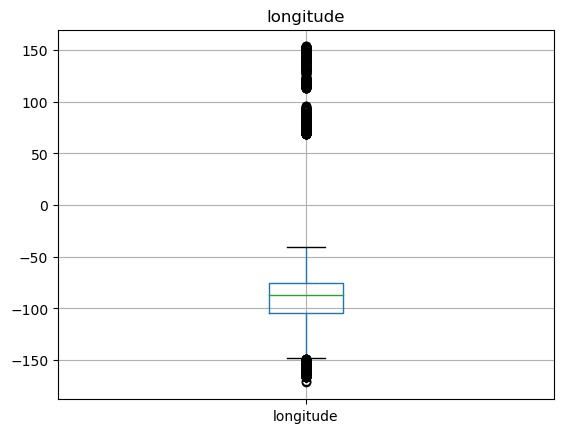

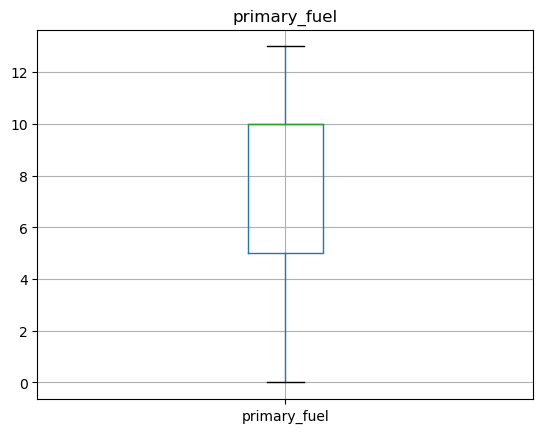

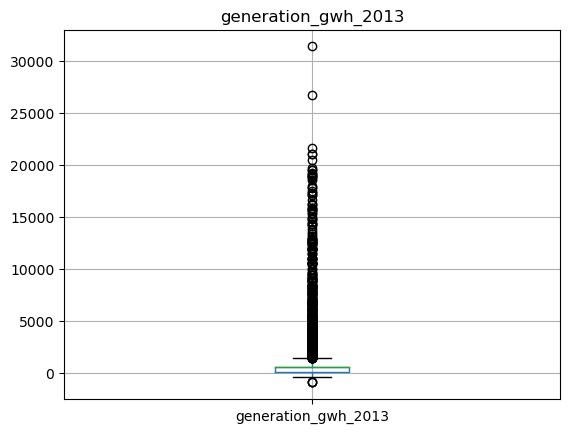

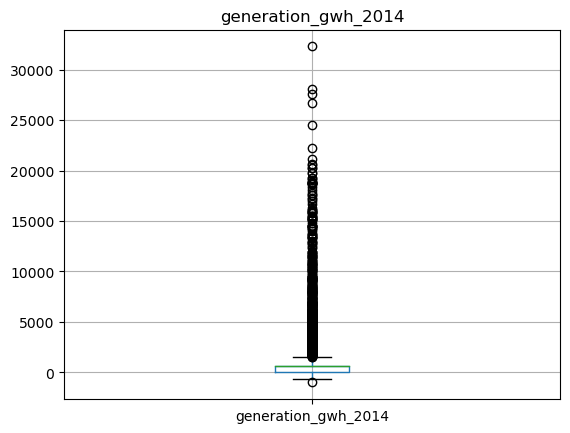

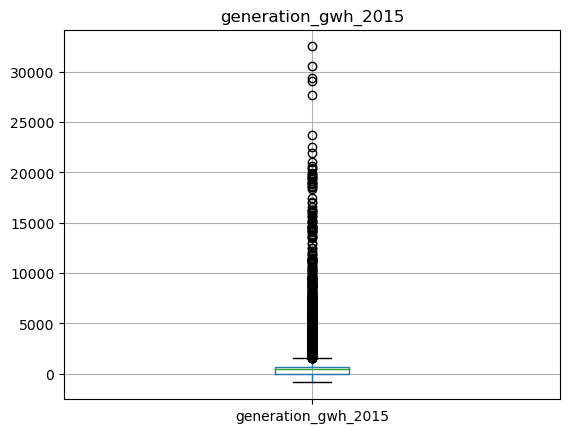

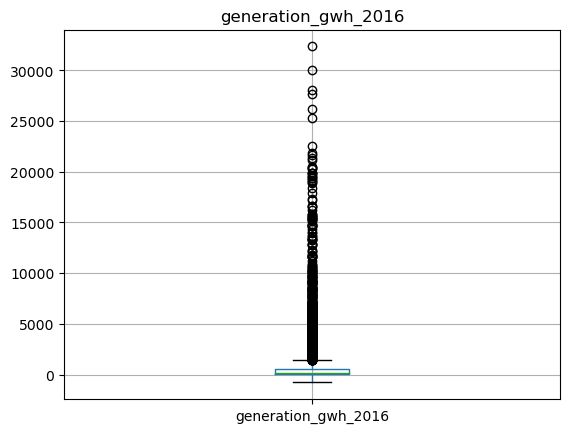

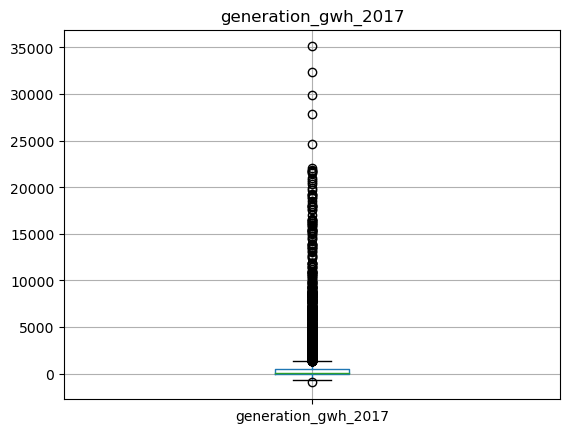

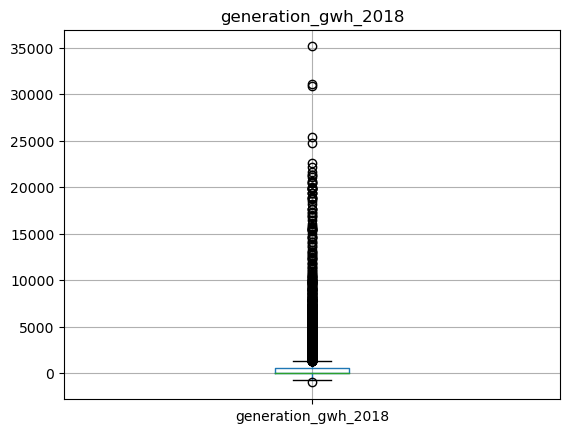

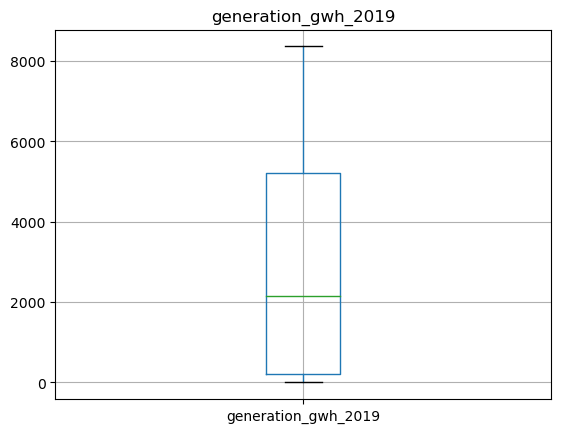

In [28]:
# Draw boxplot for each column to check Outliers
for column in df_globa:
    if column in df_globa:
        plt.figure()
        plt.gca().set_title(column)
        df_globa.boxplot([column])

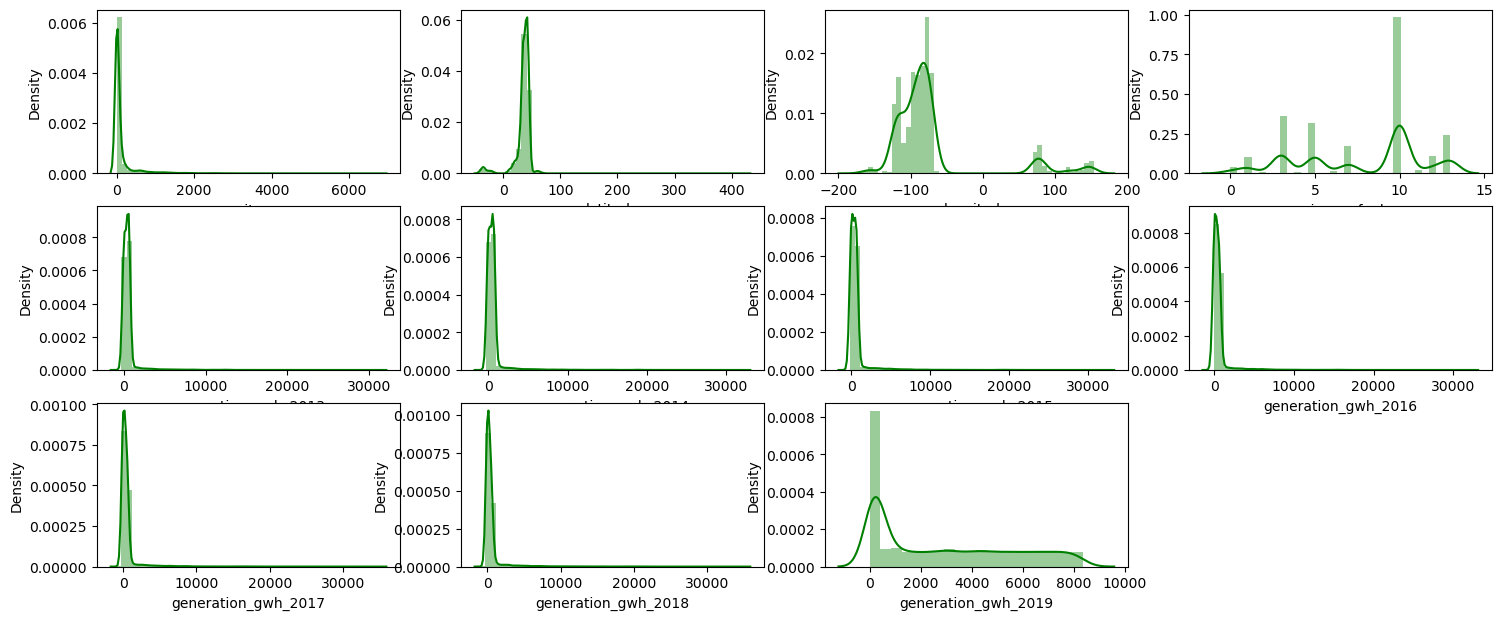

In [29]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(df_globa):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_globa[i[1]],color='g')

In [30]:
#Removing Outlier

from scipy.stats import zscore

z=np.abs(zscore(df_globa[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw','longitude','latitude']]))
print(np.where(z>3))

(array([    0,     0,     1, ..., 13150, 13260, 13265], dtype=int64), array([6, 7, 6, ..., 5, 6, 5], dtype=int64))


In [31]:
 # Checking the shape of the dataset after outliers have been remove and reassigning the changed dataframe name to our original dataframe name
z = np.abs(zscore(df_globa[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw','longitude','latitude']]))
threshold = 3
df1 = df_globa[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_globa.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_globa.shape[0]-df1.shape[0])/df_globa.shape[0]*100)

df_globa=df1.copy() 

Shape of the dataframe before removing outliers:  (13298, 11)
Shape of the dataframe after removing outliers:  (12345, 11)
Percentage of data loss post outlier removal:  7.1664912016844635


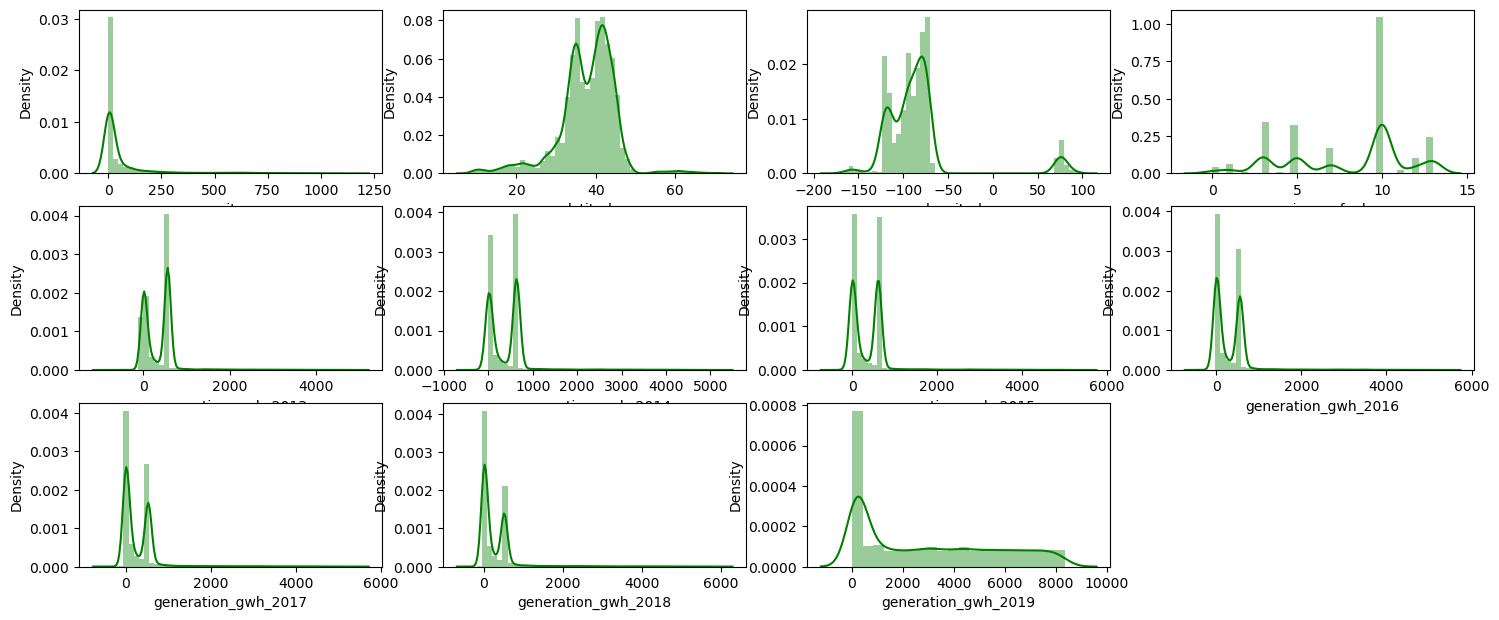

In [32]:
#checking skewing of the dataset distribution after the outliers has been removed

plt.figure(figsize=(18,20))
for i in enumerate(df_globa):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_globa[i[1]],color='g')

In [33]:
df_globa.skew()

capacity_mw            3.697258
latitude              -0.732832
longitude              2.659424
primary_fuel          -0.498860
generation_gwh_2013    4.083136
generation_gwh_2014    3.652169
generation_gwh_2015    3.938735
generation_gwh_2016    4.403836
generation_gwh_2017    4.501003
generation_gwh_2018    4.717034
generation_gwh_2019    0.485916
dtype: float64

In [34]:
df_globa

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
1,98.0,24.7663,74.6090,1,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
2,39.2,21.9038,69.3732,13,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
3,135.0,23.8712,91.3602,3,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,196
5,250.0,23.7689,68.6447,1,1.528000,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,196
...,...,...,...,...,...,...,...,...,...,...,...
11874,3.4,42.8869,-76.9683,13,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,736
11875,1.0,44.3195,-92.6703,10,563.383222,635.739731,616.801877,561.784508,532.472482,1.161000,938
11876,0.0,44.0460,-92.7600,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
11877,0.0,39.7373,-105.0170,10,0.000000,0.000000,0.000000,561.784508,532.472482,513.679016,196


In [35]:
df_globa.skew()

capacity_mw            3.697258
latitude              -0.732832
longitude              2.659424
primary_fuel          -0.498860
generation_gwh_2013    4.083136
generation_gwh_2014    3.652169
generation_gwh_2015    3.938735
generation_gwh_2016    4.403836
generation_gwh_2017    4.501003
generation_gwh_2018    4.717034
generation_gwh_2019    0.485916
dtype: float64

# 1. Classification model

In [36]:
# Defining input features and target variable for Classification
x =df_globa.drop(['primary_fuel'], axis=1)
y=df_globa['primary_fuel']

In [37]:
# Feature scaling using standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-0.394331,-1.370671,3.521836,0.370495,0.415537,0.411414,0.417353,0.437653,0.419586,-1.024045
1,0.204894,-1.855710,3.552522,0.370495,0.415537,0.411414,0.417353,0.437653,0.419586,-1.024045
2,-0.164053,-2.261968,3.435105,0.370495,0.415537,0.411414,0.417353,0.437653,0.419586,-1.024045
3,0.437054,-1.982747,3.928181,-0.794864,0.381158,0.831219,1.030499,0.691555,0.628539,-1.024045
4,1.158634,-1.997266,3.418768,-0.796706,1.406996,1.506592,1.578477,1.627749,1.279039,-1.024045
...,...,...,...,...,...,...,...,...,...,...
12340,-0.388684,0.716038,0.153281,-0.792254,-0.797315,-0.724945,-0.641903,-0.589621,-0.529108,-0.823488
12341,-0.403743,0.919359,-0.198849,0.370495,0.415537,0.411414,0.417353,0.437653,-0.531835,-0.748465
12342,-0.410017,0.880542,-0.200861,0.370495,0.415537,0.411414,0.417353,0.437653,0.419586,-1.024045
12343,-0.410017,0.269034,-0.475734,-0.799880,-0.802027,-0.729549,0.417353,0.437653,0.419586,-1.024045


Dataset Splitting and Training:

In [38]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [40]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

acc_sgd

49.17

2. Random Forest:

In [41]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.99

 3. Logistic Regression:

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

57.92

4. K Nearest Neighbor:

In [43]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test) 
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

82.75

5. Gaussian Naive Bayes:

In [44]:
# 2. Regression model
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred =gaussian.predict(x_test) 
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

38.98

6. Perceptron: 

In [45]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

51.51

7. Linear Support Vector Machine:

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

56.75

8. Decision Tree:

In [47]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.99

Which is the best Model?

In [48]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.99,Random Forest
99.99,Decision Tree
82.75,KNN
57.92,Logistic Regression
56.75,Support Vector Machines
51.51,Perceptron
49.17,Stochastic Gradient Decent
38.98,Naive Bayes


As we can see, Decision Tree and Random_forest have the best Score ranked on the table, indicating the best model. However using the cross validation to see which is the best model.

In [49]:
#cross validation for Decision Tree
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75       0.73987854 0.72874494 0.70445344 0.74595142 0.68825911
 0.73150963 0.71529889 0.70820669 0.74772036]
Mean: 0.7260023011702742
Standard Deviation: 0.01999020434641414


In [50]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(random_forest, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81983806 0.82287449 0.80668016 0.79149798 0.8097166  0.80870445
 0.80952381 0.81762918 0.80749747 0.82776089]
Mean: 0.8121723088408419
Standard Deviation: 0.009749865416624509


The Mean Score for Random forest Classifier Model has Mean Score of 81% while that of the Decision Tree is 72%.Hence the Random forest give more accurate prediction.

In [51]:
# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train, y_train)

# Predict on the validation set
y_pred = random_forest.predict(x_test)
y_pred_proba = random_forest.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.79      0.24      0.37        46
           1       0.58      0.50      0.54        62
           2       0.00      0.00      0.00         9
           3       0.70      0.70      0.70       338
           4       0.86      0.38      0.52        16
           5       0.71      0.79      0.74       309
           6       0.00      0.00      0.00         1
           7       0.84      0.84      0.84       170
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.92      0.98      0.95      1138
          11       0.83      0.88      0.86        17
          12       0.72      0.44      0.55       115
          13       0.78      0.77      0.77       244

    accuracy                           0.83      2469
   macro avg       0.55      0.47      0.49      2469
weighted avg       0.82      0.83      0.82      2469

Accuracy: 0.8254353989469

This has an 82% accuracy prediction

In [52]:
df_globa

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
1,98.0,24.7663,74.6090,1,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
2,39.2,21.9038,69.3732,13,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
3,135.0,23.8712,91.3602,3,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,196
5,250.0,23.7689,68.6447,1,1.528000,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,196
...,...,...,...,...,...,...,...,...,...,...,...
11874,3.4,42.8869,-76.9683,13,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,736
11875,1.0,44.3195,-92.6703,10,563.383222,635.739731,616.801877,561.784508,532.472482,1.161000,938
11876,0.0,44.0460,-92.7600,10,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,196
11877,0.0,39.7373,-105.0170,10,0.000000,0.000000,0.000000,561.784508,532.472482,513.679016,196


# 2. Regression model

In [53]:
# Defining input features and target variable for Classification
x1 = df_globa.drop(['capacity_mw'], axis=1)
y1= df_globa['capacity_mw']

In [54]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

Model Training and Evaluation:

In [55]:
#Import training libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import  SVR

from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


1. Random Forest:

In [56]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train_1, y_train_1)
pred_random_forest = random_forest.predict(x_test_1)
pred_train = random_forest.predict(x_train_1)


R2_Score_rf = r2_score(y_test_1, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test_1, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test_1, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test_1, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)

RandomForestRegressor()
R2_Score_rf:  77.04653540971866
R2_Score on training Data:  96.17153828749541
Mean Absolute error:  26.897718315805836
Mean Squared error:  5806.309395951126
Root Mean Squared error:  76.19914301323294


2. K Nearest Neighbor:

In [57]:
knn =KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train_1, y_train_1)
pred_knn = knn.predict(x_test_1)
pred_train = knn.predict(x_train_1)


R2_Score_kn = r2_score(y_test_1, pred_knn)*100
R2_Score_training_kn = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_kn = mean_absolute_error(y_test_1, pred_knn)
Mean_Squared_error_kn = mean_squared_error(y_test_1, pred_knn)
Root_Mean_Squared_error_kn= np.sqrt(mean_squared_error(y_test_1, pred_knn))

print(knn)
print("R2_Score_kn: ", R2_Score_kn)
print("R2_Score on training Data: ", R2_Score_training_kn)
print("Mean Absolute error: ", Mean_Absolute_error_kn)
print("Mean Squared error: ", Mean_Squared_error_kn)
print("Root Mean Squared error: ", Root_Mean_Squared_error_kn)

KNeighborsRegressor(n_neighbors=3)
R2_Score_kn:  67.42446995205604
R2_Score on training Data:  81.48544650463266
Mean Absolute error:  32.649230997704876
Mean Squared error:  8240.307490467036
Root Mean Squared error:  90.77613943359255


3. Decision Tree:

In [58]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train_1, y_train_1)
pred_decision_tree = decision_tree.predict(x_test_1)
pred_train = decision_tree.predict(x_train_1)

R2_Score_dt = r2_score(y_test_1, pred_decision_tree)*100
R2_Score_training_dt = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_dt = mean_absolute_error(y_test_1, pred_decision_tree)
Mean_Squared_error_dt = mean_squared_error(y_test_1, pred_decision_tree)
Root_Mean_Squared_error_dt =  np.sqrt(mean_squared_error(y_test_1, pred_decision_tree))

print(decision_tree)
print("R2_Score_dt: ", R2_Score_dt)
print("R2_Score on training Data: ", R2_Score_training_dt)
print("Mean Absolute error: ", Mean_Absolute_error_dt)
print("Mean Squared error: ", Mean_Squared_error_dt)
print("Root Mean Squared error: ", Root_Mean_Squared_error_dt)

DecisionTreeRegressor()
R2_Score_dt:  44.99296009589664
R2_Score on training Data:  99.99073134717041
Mean Absolute error:  38.01075517367741
Mean Squared error:  13914.583194289758
Root Mean Squared error:  117.96009153222016


4. Logistic Regression:

In [59]:
logreg = LinearRegression()
logreg.fit(x_train_1, y_train_1)
pred_logreg = logreg.predict(x_test_1)
pred_train = logreg.predict(x_train_1)

R2_Score_lo = r2_score(y_test_1, pred_logreg)*100
R2_Score_training_lo = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_lo = mean_absolute_error(y_test_1, pred_logreg)
Mean_Squared_error_lo = mean_squared_error(y_test_1, pred_logreg)
Root_Mean_Squared_error_lo =  np.sqrt(mean_squared_error(y_test_1, pred_logreg))

print(logreg)
print("R2_Score_lo: ", R2_Score_lo)
print("R2_Score on training Data: ",R2_Score_training_lo)
print("Mean Absolute error: ", Mean_Absolute_error_lo)
print("Mean Squared error: ", Mean_Squared_error_lo)
print("Root Mean Squared error: ", Root_Mean_Squared_error_lo)

LinearRegression()
R2_Score_lo:  50.41186958039398
R2_Score on training Data:  49.58895742665443
Mean Absolute error:  65.68041383040011
Mean Squared error:  12543.815616615768
Root Mean Squared error:  111.99917685686698


5. Gradient Boosting 

In [60]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train_1, y_train_1)
pred_GBR = GBR.predict(x_test_1)
pred_train = GBR.predict(x_train_1)

R2_Score_gbr = r2_score(y_test_1, pred_GBR)*100
R2_Score_training_gbr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_gbr = mean_absolute_error(y_test_1, pred_GBR)
Mean_Squared_error_gbr = mean_squared_error(y_test_1, pred_GBR)
Root_Mean_Squared_error_gbr =  np.sqrt(mean_squared_error(y_test_1, pred_GBR))

print(GBR)
print("R2_Score_gbr: ", R2_Score_gbr)
print("R2_Score on training Data: ", R2_Score_training_gbr)
print("Mean Absolute error: ", Mean_Absolute_error_gbr)
print("Mean Squared error: ", Mean_Squared_error_gbr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_gbr)

GradientBoostingRegressor()
R2_Score_gbr:  73.1842448133919
R2_Score on training Data:  75.45103165262826
Mean Absolute error:  34.13982919627347
Mean Squared error:  6783.314592318778
Root Mean Squared error:  82.36088023035437


6. Lasso

In [61]:
lass = Lasso()
lass.fit(x_train_1, y_train_1)
pred_lass = lass.predict(x_test_1)
pred_train = lass.predict(x_train_1)

R2_Score_las = r2_score(y_test, pred_lass)*100
R2_Score_training_las = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_las = mean_absolute_error(y_test_1, pred_lass)
Mean_Squared_error_las =  mean_squared_error(y_test_1, pred_lass)
Root_Mean_Squared_error_las = np.sqrt(mean_squared_error(y_test_1, pred_lass))

print(lass)
print("R2_Score_las: ", R2_Score_las)
print("R2_Score on training Data: ", R2_Score_training_las)
print("Mean Absolute error: ", Mean_Absolute_error_las)
print("Mean Squared error: ", Mean_Squared_error_las)
print("Root Mean Squared error: ", Root_Mean_Squared_error_las)

Lasso()
R2_Score_las:  -127522.18257591836
R2_Score on training Data:  49.5885307805635
Mean Absolute error:  65.62484251067698
Mean Squared error:  12541.873162656555
Root Mean Squared error:  111.99050478793528


7. Ridge

In [62]:
rid = Ridge()
rid .fit(x_train_1, y_train_1)
pred_rid  = rid .predict(x_test_1)
pred_train = rid .predict(x_train_1)

R2_Score_rid = r2_score(y_test_1, pred_rid)*100
R2_Score_training_rid = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rid = mean_absolute_error(y_test_1, pred_rid)
Mean_Squared_error_rid =  mean_squared_error(y_test_1, pred_rid)
Root_Mean_Squared_error_rid = np.sqrt(mean_squared_error(y_test_1, pred_rid))

print(rid )
print("R2_Score_rid: ", R2_Score_rid)
print("R2_Score on training Data: ", R2_Score_training_rid)
print("Mean Absolute error: ", Mean_Absolute_error_rid)
print("Mean Squared error: ", Mean_Squared_error_rid)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rid)

Ridge()
R2_Score_rid:  50.41187507822886
R2_Score on training Data:  49.58895742619143
Mean Absolute error:  65.68035370897502
Mean Squared error:  12543.814225883221
Root Mean Squared error:  111.99917064819374


8. SVR

In [63]:
svr = SVR()
svr.fit(x_train_1, y_train_1)
pred_svr = svr.predict(x_test_1)
pred_train = svr.predict(x_train_1)

R2_Score_svr = r2_score(y_test_1, pred_svr)*100
R2_Score_training_svr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_svr = mean_absolute_error(y_test_1, pred_svr)
Mean_Squared_error_svr =  mean_squared_error(y_test_1, pred_svr)
Root_Mean_Squared_error_svr = np.sqrt(mean_squared_error(y_test_1, pred_svr))

print(svr)
print("R2_Score_svr: ", R2_Score_svr)
print("R2_Score on training Data: ", R2_Score_training_svr)
print("Mean Absolute error: ", Mean_Absolute_error_svr)
print("Mean Squared error: ", Mean_Squared_error_svr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_svr)

SVR()
R2_Score_svr:  18.148720012525622
R2_Score on training Data:  16.851053459680266
Mean Absolute error:  53.49420618986928
Mean Squared error:  20705.10332732622
Root Mean Squared error:  143.89267989486547


In [64]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 
              'Linear Regression', 'Gradient Boosting', 'Lasso', 
              'Ridge', 'SVR'],
    'Score': [R2_Score_rf, R2_Score_kn, R2_Score_dt, 
              R2_Score_lo, R2_Score_gbr, R2_Score_las, 
             R2_Score_rid, R2_Score_svr]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
77.046535,Random Forest
73.184245,Gradient Boosting
67.424470,KNN
50.411875,Ridge
50.411870,Linear Regression
44.992960,Decision Tree
18.148720,SVR
-127522.182576,Lasso


As we can see, Random Forest is ranked the first on the table with the highest R2 Score. Checking how Random Forest performs.

In [65]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train_1, y_train_1)
pred_random_forest = random_forest.predict(x_test_1)
pred_train = random_forest.predict(x_train_1)


R2_Score_rf = r2_score(y_test_1, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test_1, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test_1, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test_1, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)

RandomForestRegressor()
R2_Score_rf:  76.44059814925957
R2_Score on training Data:  96.14583619206734
Mean Absolute error:  26.923581047171954
Mean Squared error:  5959.587311575685
Root Mean Squared error:  77.19836339959342


In [66]:
#Saving the best model
import joblib
joblib.dump(random_forest, "Global_power.pkl")

['Global_power.pkl']

In [67]:
# PREDICTION OF TEST RESULT
y_pred = random_forest.predict(x_test_1)
print('Predictions:\n', y_pred)

Predictions:
 [20.451       0.          1.         ...  2.07266667  0.
  1.584     ]


In [68]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test_1,"Predicted":y_pred})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
        Actual  Predicted
2903     20.0  20.451000
9863      0.0   0.000000
621       1.0   1.000000
5023    206.9  22.960000
3217      6.4   7.225000
...       ...        ...
6442     22.1  32.566000
7742      3.2   2.427000
10314     1.5   2.072667
5752      0.0   0.000000
10387     1.5   1.584000

[2469 rows x 2 columns]
